In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df9=pd.read_csv("base_enriquecida")
df9.head()

,ANO-MES,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2019-12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263
1,2019-12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987
2,2019-12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311
3,2019-12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812
4,2019-12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356


# Análises referentes às UF (coluna SG_UF_NCM)

In [3]:
g13=df9.groupby("SG_UF_NCM").sum()

In [4]:
g13["SG_UF_NCM"]=g13.index
#Foi necessário o presente comando para criar uma coluna com os códigos NCM (os quais figuravam apenas como índice).
g13.head()

,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,SG_UF_NCM
SG_UF_NCM,,,,,,,
AC,5127081493,465.375728,464.012275,2915450,3252941,1957132,AC
AL,1219326269866,70631.312571,70267.308882,1247118160,929741241,665845981,AL
AM,6553022330873,347260.645855,345510.039489,48838953110,2371810301,10181256697,AM
AP,107586833400,6125.407094,6100.528876,74315573,227132011,130071846,AP
BA,3473537331701,190143.864326,189324.842085,6654666323,9413564286,6772458007,BA


In [5]:
g13=g13.sort_values(by=["QT_ESTAT"],ascending=False)

([Text(0, 0.5, 'Unidades da Federação'),
  Text(0.5, 0, 'Qtde de importações na unid.de medida estat.por UF em 2019')],)

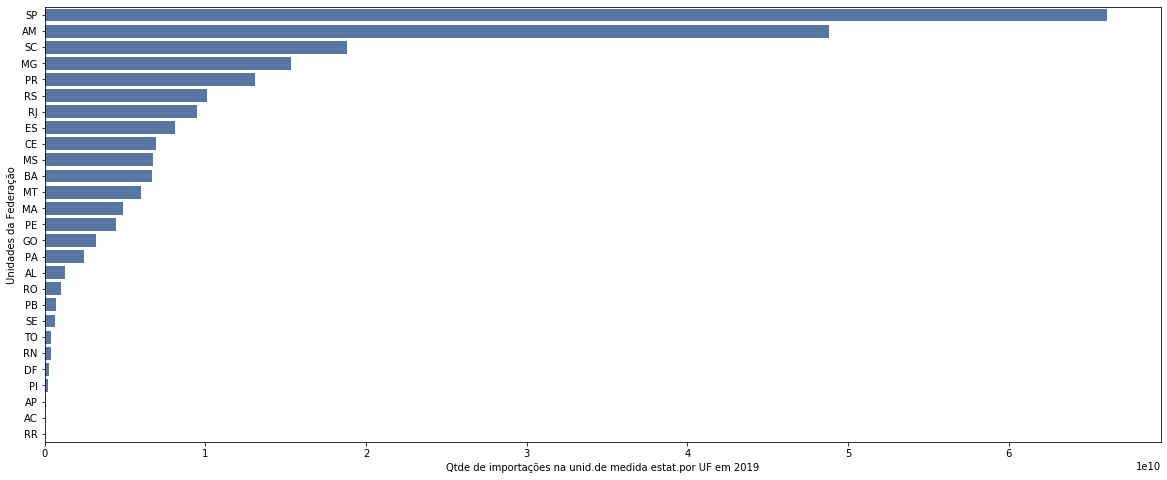

In [6]:
f, ax = plt.subplots(figsize=(20, 8))
sns.set_color_codes("deep")
sns.barplot(x="QT_ESTAT", y="SG_UF_NCM", data=g13,
            label="", color="b")
ax.set(ylabel="Unidades da Federação",    xlabel="Qtde de importações na unid.de medida estat.por UF em 2019"),

Como era de se esperar, a esmagadora maioria das importações se dá em São Paulo, provavelmente por ser o centro econômico do país e contemplar grande quantidade de indústrias e estabelecimentos comerciais.
Na sequência temos o estado do Amazonas, muito provavelmente em função da importação de componentes eletrônicos (que como já foi analisado são as mercadorias - em quantidade - mais importadas no país). Ao longo da análise corrente iremos detalhar as mercadorias mais importadas por UF e poderemos confirmar se a presente suposição se confirma.
Em terceiro lugar na listagem está o estado de Santa Catarina, muito provavelmente pelos incentivos fiscais (ICMS) que atraem para lá enorme quantidade de importadores.

In [7]:
#Tendo em vista que as UF da parte inferior da lista têm a visualização comprometida no gráfico acima, serão calculados aos percentuais:
g13["% QT_ESTAT"]=g13["QT_ESTAT"]/sum(g13["QT_ESTAT"])*100
g13[["QT_ESTAT","% QT_ESTAT"]]

,QT_ESTAT,% QT_ESTAT
SG_UF_NCM,,
SP,66135985184,27.991475
AM,48838953110,20.670658
SC,18791393071,7.953292
MG,15336136571,6.490885
PR,13091711585,5.540952
RS,10107479102,4.277902
RJ,9495319451,4.018811
ES,8137274789,3.444030
CE,6959489586,2.945543


Segue outra forma de representar as UF que mais importaram:

In [9]:
# Import do geopandas
import geopandas as gpd

In [10]:
# Passando as infos das UF do Brasil para o df INFOS_UFS
INFOS_UFS = gpd.read_file("bcim_2016_21_11_2018.gpkg", layer = "lim_unidade_federacao_a")

In [11]:
INFOS_UFS.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

Estado: Paraná


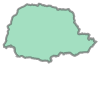

In [12]:
#teste
print("Estado: "+ INFOS_UFS.nome[2])
INFOS_UFS.geometry[2]

In [13]:
#preparando um DF simplificado para o merge
teste=g13[["SG_UF_NCM","QT_ESTAT"]]
teste.head()

,SG_UF_NCM,QT_ESTAT
SG_UF_NCM,,
SP,SP,66135985184
AM,AM,48838953110
SC,SC,18791393071
MG,MG,15336136571
PR,PR,13091711585


In [14]:
#alterou-se o índice para possibilitar o merge
teste.set_index([np.arange(1,28)],inplace=True)

In [15]:
teste.head()

,SG_UF_NCM,QT_ESTAT
1,SP,66135985184
2,AM,48838953110
3,SC,18791393071
4,MG,15336136571
5,PR,13091711585


In [16]:
#mantendo o mesmo nome na coluna "chave"em ambos os DF
INFOS_UFS.rename({"sigla":"SG_UF_NCM"},axis=1, inplace=True)

In [17]:
BRASIL = INFOS_UFS.merge(teste, on = "SG_UF_NCM", how = "left")

In [18]:
BRASIL.head()

,nome,nomeabrev,geometriaaproximada,SG_UF_NCM,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry,QT_ESTAT
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",3213351715
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",6729920908
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",13091711585
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",15336136571
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",628175000


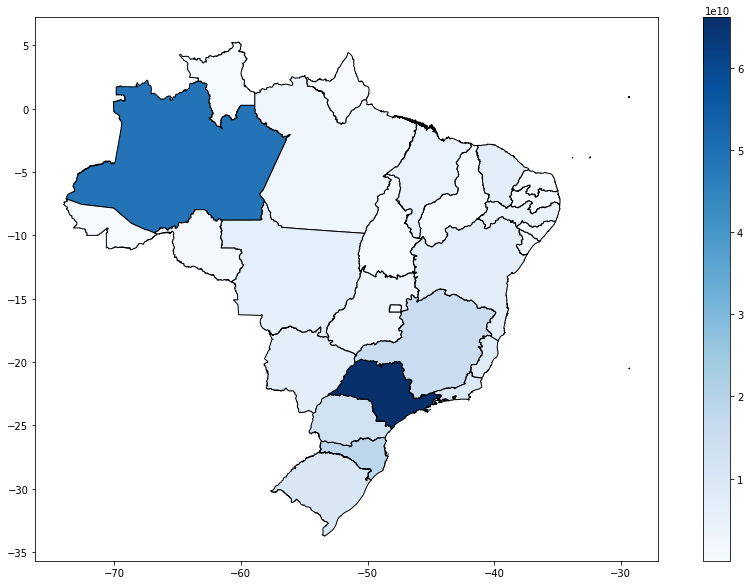

In [20]:
BRASIL.plot(column = "QT_ESTAT", cmap = "Blues", figsize = (16,10), legend=True, edgecolor="black")

([Text(0, 0.5, 'Unidades da Federação'),
  Text(0.5, 0, 'Valor das importações por UF em 2019')],)

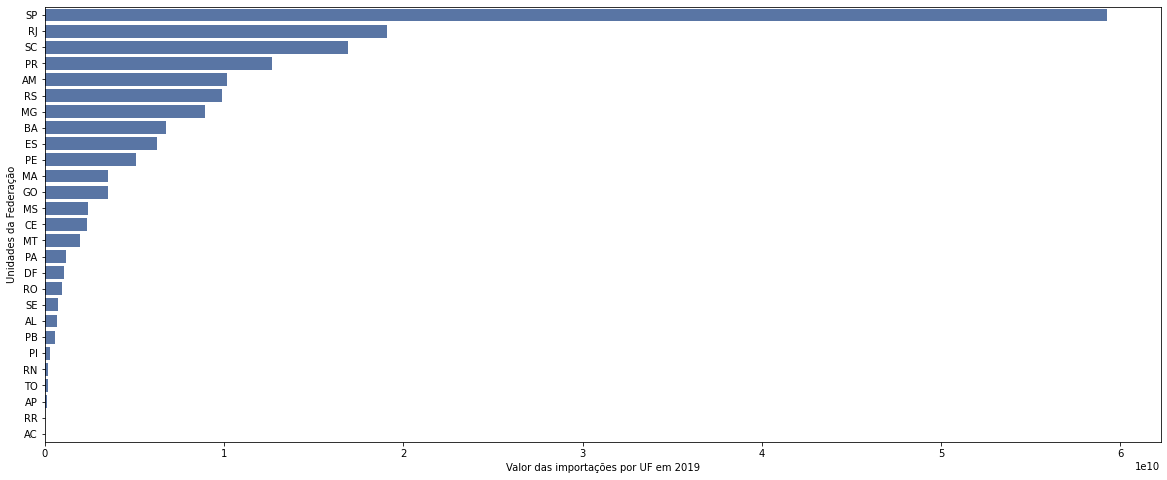

In [188]:
# Na sequência, será repetida a análise anterior, porém, ao invés da QT_ESTAT, a referência será o VL_FOB
g13=g13.sort_values(by=["VL_FOB"],ascending=False)

f, ax = plt.subplots(figsize=(20, 8))
sns.set_color_codes("deep")
sns.barplot(x="VL_FOB", y="SG_UF_NCM", data=g13,
            label="", color="b")
ax.set(ylabel="Unidades da Federação",    xlabel="Valor das importações por UF em 2019"),

Ao se fazer a consulta por valor importado, São Paulo mantém-se na liderança (inclusive, na análise por VL_FOB das importações, a posição do estado de SP distancia-se ainda mais das demais). No entanto, o estado do RJ assume a segunda colocação no lugar do Amazonas. Provavelmente, isso se deve ao fato de que os componentes eletrônicos importados por AM têm um valor menor que as mercadorias importadas pelo RJ (provavelmente trate-se de derivados do petróleo).
Santa Catarina figura na terceira colocação e, como já comentado, tal fato decorre dos incentivos ficais que atraem para o estado diversos importadores. Acredita-se (será confirmado na sequência da análise) que exista grande variedade de mercadorias importadas em Santa Catarina, o que faz com que ela permaneça entre as primeiras UF tanto em quantidade quanto em valor importado.

In [189]:
# refazer o cálculo dos percentuais, agora pora incluir o % do valor FOB importado por cado UF em relação ao total
g13["% VL_FOB"]=g13["VL_FOB"]/sum(g13["VL_FOB"])*100

In [190]:
g13[["QT_ESTAT","% QT_ESTAT", "VL_FOB","% VL_FOB"]]

,QT_ESTAT,% QT_ESTAT,VL_FOB,% VL_FOB
SG_UF_NCM,,,,
SP,66135985184,27.991475,59273919133,33.861035
RJ,9495319451,4.018811,19120111637,10.922625
SC,18791393071,7.953292,16920155678,9.665870
PR,13091711585,5.540952,12698128865,7.253979
AM,48838953110,20.670658,10181256697,5.816182
RS,10107479102,4.277902,9895343553,5.652850
MG,15336136571,6.490885,8948789980,5.112118
BA,6654666323,2.816529,6772458007,3.868859
ES,8137274789,3.444030,6274184735,3.584214


###### Na sequência, buscam-se identificar as 
###### 1) mercadorias mais recorrentemente importadas por cada UF;
###### 2) mercadorias importadas em maior quantidade na unidade de medida estatística;
###### 3) mercadorias que perfazem o maior valor importado por UF ao longo do ano de 2019; 
###### 4) Unidades da Federação (UF) com maior diversidade de mercadorias importadas.

In [191]:
# Por "recorrente" entenda-se os códigos que mais "aparecem" no dataset original.
g14=df9.groupby(['SG_UF_NCM','CO_NCM']).size().reset_index().rename(columns={0:'contagem'})
g14.sort_values(by=["SG_UF_NCM","contagem"],ascending=False)

,SG_UF_NCM,CO_NCM,contagem
65161,TO,90041000,40
65158,TO,90031910,35
65157,TO,90031100,34
64817,TO,39269090,29
65156,TO,90015000,21
...,...,...,...
41,AC,84836090,1
42,AC,85011019,1
43,AC,85015210,1
45,AC,85371020,1


In [192]:
g14.groupby(["SG_UF_NCM"], sort=False)["contagem"].max()

SG_UF_NCM
AC      11
AL     158
AM    1006
AP      25
BA     627
CE     364
DF     109
ES     469
GO     286
MA      47
MG    1145
MS     132
MT     134
PA     389
PB      67
PE     403
PI      37
PR    1081
RJ     824
RN      87
RO     154
RR      21
RS     939
SC    1535
SE     393
SP    2247
TO      40
Name: contagem, dtype: int64

In [193]:
idx = g14.groupby(["SG_UF_NCM"])["contagem"].transform(max) == g14["contagem"]

In [194]:
# Códigos NCM mais recorrentemente importados por UF (no caso do AC, houve dois códigos com 11 registros)
g20=g14[idx]
g20

,SG_UF_NCM,CO_NCM,contagem
8,AC,25232990,11
17,AC,40111000,11
638,AL,39269090,158
5138,AM,87141000,1006
5716,AP,70133700,25
7471,BA,73181500,627
9476,CE,39269090,364
12224,DF,84717012,109
15157,ES,85176259,469
16714,GO,39269090,286


In [13]:
# Na sequência iremos obter a descrição dos códigos NCM mais recorrentemente importados por UF em 2019
CO_NCM=pd.read_csv("NCM.csv",sep=";",encoding='latin')

In [14]:
CO_NCM=CO_NCM.drop(columns=['CO_UNID', 'CO_SH6', 'CO_PPE', 'CO_PPI', 'CO_FAT_AGREG',
       'CO_CUCI_ITEM', 'CO_CGCE_N3', 'CO_SIIT', 'CO_ISIC_CLASSE',
       'CO_EXP_SUBSET', 'NO_NCM_ESP', 'NO_NCM_ING'])
CO_NCM.head()

,CO_NCM,NO_NCM_POR
0,38085910,Outras mercadorias mencionadas na Nota de subp...
1,38085921,Mercadorias à base de metamidofós (ISO) ou mon...
2,38085922,"Mercadorias à base de endossulfan (ISO), apres..."
3,38085923,"Mercadorias à base de alaclor (ISO), apresenta..."
4,38085929,"Mercadorias à base de outras substâncias, apre..."


##### Listagem com as mercadorias (códigos NCM e respectivas descrições) mais recorrentemente importadas (em outras palavras, as que mais contêm registros no dataset principal - seja por aparecerem em um maior número de meses, ou por chegarem por modais diferentes, de países difererente, em URF distintas, etc.) por cada UF em 2019.

Destaque-se que tal informação, a meu ver, tem pouca relevância no contexto da análise das importações brasileiras em 2019.

In [198]:
g21=pd.merge(g20, CO_NCM, how='left', on=['CO_NCM'])
g21

,SG_UF_NCM,CO_NCM,contagem,NO_NCM_POR
0,AC,25232990,11,"Outros tipos de cimento ""portland"""
1,AC,40111000,11,"Pneumáticos novos, de borracha, dos tipos util..."
2,AL,39269090,158,Outras obras de plásticos
3,AM,87141000,1006,Partes e acessórios de motocicletas (inclusive...
4,AP,70133700,25,Outros copos de vidro exceto de vitrocerâmica
5,BA,73181500,627,"Outros parafusos e pinos ou pernos, mesmo com ..."
6,CE,39269090,364,Outras obras de plásticos
7,DF,84717012,109,"Unidades de discos magnéticos, para discos ríg..."
8,ES,85176259,469,Outros equipamentos terminais ou repetidores
9,GO,39269090,286,Outras obras de plásticos


In [199]:
# preparando os dados para contar, na sequência, a quantidade de diferentes registros de códigos NMC por UF
g15=g14.drop(columns=["contagem"])
g15.head()

,SG_UF_NCM,CO_NCM
0,AC,7031019
1,AC,7032090
2,AC,7112010
3,AC,8012200
4,AC,11010010


In [200]:
# Quantidade de diferentes códigos NCM importados por UF
g16=g15.groupby(['SG_UF_NCM']).size().reset_index().rename(columns={0:'contagem'})
g16

,SG_UF_NCM,contagem
0,AC,47
1,AL,2411
2,AM,3058
3,AP,585
4,BA,2862
5,CE,2440
6,DF,1402
7,ES,2961
8,GO,2516
9,MA,705


###### Listagem das UF com a maior diversidade de códigos NCM importados:

In [201]:
g16.sort_values(by=["contagem"],ascending=False)

,SG_UF_NCM,contagem
25,SP,7797
23,SC,5756
18,RJ,5069
17,PR,4993
22,RS,4722
10,MG,4668
2,AM,3058
7,ES,2961
4,BA,2862
15,PE,2682


In [202]:
# A análise realizada acima leva em conta as NCM mais recorrentemente importadas e não as mais importadas em quantidade.
# Na sequência, segue nova análise em que se levará em conta a maior quantidade importada na unidade de medida estatística (QT_ESTAT)
g17=df9.groupby(['SG_UF_NCM','CO_NCM']).sum().reset_index()
g17.head(50)

,SG_UF_NCM,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,AC,7031019,11.918995,11.656321,270720,270720,108626
1,AC,7032090,3.741055,3.884405,24750,24750,17251
2,AC,7112010,15.483414,15.348871,68910,68910,28269
3,AC,8012200,4.108924,4.154725,20000,20000,45750
4,AC,11010010,39.697084,39.378888,392000,392000,125076
5,AC,12119010,11.986674,11.982167,55000,55000,50750
6,AC,15091000,4.000918,3.895557,13147,13147,75459
7,AC,20057000,8.241112,8.207287,37800,37800,21775
8,AC,25232990,43.178971,43.022790,1602250,1602250,135745
9,AC,28332960,8.263649,8.241112,80000,80000,66871


In [203]:
# identificando os valores máximos de QT_ESTAT por UF (independentemente de a qual NCM se referem)
g17.groupby(["SG_UF_NCM"], sort=False)["QT_ESTAT"].max()

SG_UF_NCM
AC        1602250
AL      179637361
AM    19141207533
AP       24191554
BA     1759546628
CE     3927475383
DF      253159155
ES     5574856249
GO      845478442
MA      903350814
MG     3671754970
MS     4802251722
MT     2350821391
PA      803486010
PB      240962540
PE     1446475460
PI       44701195
PR     1307542930
RJ     4233112110
RN      266268088
RO      227879600
RR         280675
RS     1689625108
SC     3114535066
SE      161579800
SP    17288570837
TO      137857000
Name: QT_ESTAT, dtype: int64

In [204]:
# obtendo os índices em que o df "g17 (que já é o agrupodo por UF e NCM) groupby ["SG_UF_NCM"]" apresenta os maiores valores para (somatório) da QT_ESTAT 
idx1=g17.groupby(["SG_UF_NCM"])["QT_ESTAT"].transform(max)==g17["QT_ESTAT"]

In [205]:
# filtrando o df g17 pelos índices correspondentes aos máximas QT_ESTAT por UF (que retornarão, portanto, a qual código NCM se referem)
g17[idx1]

,SG_UF_NCM,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
8,AC,25232990,43.178971,43.022790,1602250,1602250,135745
320,AL,29031500,32.022814,31.865136,179637361,179637361,54008531
4917,AM,85322410,1911.935180,1902.647833,19141207533,358923,96307256
5517,AP,10011900,23.814526,23.421982,24191554,24191554,5781371
6299,BA,27111100,94.858681,93.432745,1759546628,1759546628,465316619
9081,CE,27011200,141.597789,141.367964,3927475383,3927475383,410855957
11468,DF,27131100,43.255982,43.194156,253159155,253159155,16017639
12959,ES,27011200,154.233810,153.525220,5574856249,5574856249,874053964
16471,GO,31042090,352.650133,351.149407,845478442,845478442,278761637
18301,MA,27011200,47.506228,47.214007,903350814,903350814,51916104


In [206]:
# Listagem com os códigos NCM mais importados (maior soma de QT_ESTAT) por cada uma das UF em 2019
g18=g17[idx1].drop(columns=["câmbio_mês_atual","câmbio_mês_anterior", "KG_LIQUIDO", "VL_FOB"])
g18

,SG_UF_NCM,CO_NCM,QT_ESTAT
8,AC,25232990,1602250
320,AL,29031500,179637361
4917,AM,85322410,19141207533
5517,AP,10011900,24191554
6299,BA,27111100,1759546628
9081,CE,27011200,3927475383
11468,DF,27131100,253159155
12959,ES,27011200,5574856249
16471,GO,31042090,845478442
18301,MA,27011200,903350814


###### Listagem com as mercadorias (códigos NCM e respectivas descrições) mais importadas (maior quantidade na unidade de medida estatística) por cada UF em 2019

In [207]:
g19=pd.merge(g18, CO_NCM, how='left', on=['CO_NCM'])
g19

,SG_UF_NCM,CO_NCM,QT_ESTAT,NO_NCM_POR
0,AC,25232990,1602250,"Outros tipos de cimento ""portland"""
1,AL,29031500,179637361,"Dicloreto de etileno (ISO) (1,2-dicloroetano)"
2,AM,85322410,19141207533,"Outros condensadores fixos, com dielétrico de ..."
3,AP,10011900,24191554,"Trigo duro, exceto para semeadura"
4,BA,27111100,1759546628,Gás natural liquefeito
5,CE,27011200,3927475383,"Hulha betuminosa, não aglomerada"
6,DF,27131100,253159155,Coque de petróleo não calcinado
7,ES,27011200,5574856249,"Hulha betuminosa, não aglomerada"
8,GO,31042090,845478442,Outros cloretos de potássio
9,MA,27011200,903350814,"Hulha betuminosa, não aglomerada"


In [208]:
# Na sequência, busca-se apurar as mercadorias que representam o maior valor FOB importado por UF em 2019.
# Partir-se-á do df g17, já trabalhado anteriormente nesse mesmo Jupyter Notebook.
g17.head()

,SG_UF_NCM,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,AC,7031019,11.918995,11.656321,270720,270720,108626
1,AC,7032090,3.741055,3.884405,24750,24750,17251
2,AC,7112010,15.483414,15.348871,68910,68910,28269
3,AC,8012200,4.108924,4.154725,20000,20000,45750
4,AC,11010010,39.697084,39.378888,392000,392000,125076


In [209]:
# identificando os valores máximos de VL_FOB por UF (independentemente de a qual NCM se referem)
g17.groupby(["SG_UF_NCM"], sort=False)["VL_FOB"].max()

SG_UF_NCM
AC        445790
AL      54008531
AM    1663631099
AP      71324624
BA    1420884298
CE     410855957
DF     184448754
ES     874053964
GO     387316896
MA    1984893069
MG     640612883
MS    1264810912
MT     773407959
PA     123262092
PB     127585649
PE     668458585
PI     156982715
PR    1319946647
RJ    3313205959
RN      56933213
RO     133677259
RR      22779938
RS    1358686939
SC     614578769
SE     224276930
SP    1627159693
TO      45001029
Name: VL_FOB, dtype: int64

In [210]:
# obtendo os índices em que o df "g17 (que já é o agrupodo por UF e NCM) groupby ["SG_UF_NCM"]" apresenta os maiores valores para (somatório) da QT_ESTAT 
idx2=g17.groupby(["SG_UF_NCM"])["VL_FOB"].transform(max)==g17["VL_FOB"]

In [211]:
# filtrando o df g17 pelos índices correspondentes aos máximas VL_FOB por UF (que retornarão, portanto, a qual código NCM se referem)
g17[idx2]

,SG_UF_NCM,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
17,AC,40111000,42.996650,43.118851,17219,152740,445790
320,AL,29031500,32.022814,31.865136,179637361,179637361,54008531
4899,AM,85299020,1864.805390,1857.397784,87431378,87431378,1663631099
5526,AP,27090010,16.017432,16.087914,190075,132099801,71324624
6286,BA,27101241,242.597775,241.392684,3751271,2635872996,1420884298
9081,CE,27011200,141.597789,141.367964,3927475383,3927475383,410855957
11587,DF,30049079,133.402097,132.798864,45107,45107,184448754
12959,ES,27011200,154.233810,153.525220,5574856249,5574856249,874053964
16400,GO,30021590,431.214039,429.422242,12206,12206,387316896
18303,MA,27101921,98.840475,98.546300,3988715,3316630726,1984893069


In [212]:
# Listagem com os códigos NCM com o maior somatório de valor FOB (VL_FOB) por cada uma das UF em 2019
g22=g17[idx2].drop(columns=["câmbio_mês_atual","câmbio_mês_anterior", "KG_LIQUIDO", "QT_ESTAT"])
g22

,SG_UF_NCM,CO_NCM,VL_FOB
17,AC,40111000,445790
320,AL,29031500,54008531
4899,AM,85299020,1663631099
5526,AP,27090010,71324624
6286,BA,27101241,1420884298
9081,CE,27011200,410855957
11587,DF,30049079,184448754
12959,ES,27011200,874053964
16400,GO,30021590,387316896
18303,MA,27101921,1984893069


In [213]:
g23=pd.merge(g22, CO_NCM, how='left', on=['CO_NCM'])
g23

,SG_UF_NCM,CO_NCM,VL_FOB,NO_NCM_POR
0,AC,40111000,445790,"Pneumáticos novos, de borracha, dos tipos util..."
1,AL,29031500,54008531,"Dicloreto de etileno (ISO) (1,2-dicloroetano)"
2,AM,85299020,1663631099,Outras partes para aparelhos receptores de rad...
3,AP,27090010,71324624,Óleos brutos de petróleo
4,BA,27101241,1420884298,Naftas para petroquimica
5,CE,27011200,410855957,"Hulha betuminosa, não aglomerada"
6,DF,30049079,184448754,Outros medicamentos com compostos heterocíclic...
7,ES,27011200,874053964,"Hulha betuminosa, não aglomerada"
8,GO,30021590,387316896,"Outros produtos imunológicos, apresentados em ..."
9,MA,27101921,1984893069,Gasóleo (óleo diesel)


# Análise referente às unidades de medida estatística mais recorrentes (coluna SG_UNID)

In [241]:
df9.head()

,ANO-MES,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2019-12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263
1,2019-12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987
2,2019-12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311
3,2019-12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812
4,2019-12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356


In [242]:
g23=df9.groupby(["SG_UNID"]).size()

In [243]:
g23.sort_values(ascending=False)

SG_UNID
KGL      978971
UNID.    760161
PARES      8616
M2         5962
LITRO      5704
M3         2221
TML        1671
QUILT       457
MIL         297
GRAMA       170
DUZIA       149
M            35
MKW/H        19
dtype: int64

In [244]:
g23=g23.to_frame()

In [252]:
g23.reset_index(inplace=True)

In [253]:
g23

,SG_UNID,0
0,DUZIA,149
1,GRAMA,170
2,KGL,978971
3,LITRO,5704
4,M,35
5,M2,5962
6,M3,2221
7,MIL,297
8,MKW/H,19
9,PARES,8616


In [258]:
g23["%"]=(g23[0]/(g23[0].sum()))*100

In [262]:
g23.sort_values(by="%",ascending=False)

,SG_UNID,0,%
2,KGL,978971,55.483603
12,UNID.,760161,43.082452
9,PARES,8616,0.488316
5,M2,5962,0.337899
3,LITRO,5704,0.323277
6,M3,2221,0.125876
11,TML,1671,0.094705
10,QUILT,457,0.025901
7,MIL,297,0.016833
1,GRAMA,170,0.009635


# Análise referente às vias (ou modais) de transporte mais recorrentes (coluna NO_VIA)

In [3]:
g24=df9.groupby(["NO_VIA"]).size()

In [4]:
g24=g24.to_frame()

In [5]:
g24.reset_index(inplace=True)

In [6]:
g24["%"]=(g24[0]/(g24[0].sum()))*100

In [7]:
g24.sort_values(by="%",ascending=False)

,NO_VIA,0,%
5,MARITIMA,885619,50.192838
0,AEREA,811442,45.988825
8,RODOVIARIA,37852,2.145278
9,VIA NAO DECLARADA,27754,1.572970
2,ENTRADA/SAIDA FICTA,1189,0.067387
7,POSTAL,257,0.014566
6,MEIOS PROPRIOS,229,0.012979
1,CONDUTO/REDE DE TRANSMISSAO,39,0.002210
3,FERROVIARIA,37,0.002097
4,FLUVIAL,15,0.000850


# Análises referentes aos países exportadores (coluna NO_NCM)

In [59]:
#Verificação dos países que mais exportaram (em quantidade e em valor) para o Brasil
g25=df9.groupby("NO_PAIS").sum()

In [60]:
g25.head()

,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
NO_PAIS,,,,,,
A Designar,135355090,7.846802,7.618582,2914,756,2366
Afeganistão,17656786510,844.556020,840.751854,88621,85906,453539
"Aland, Ilhas",669830968,34.609336,34.955034,28680,22532,36037
Albânia,13351920778,848.498846,845.878965,299338,201964,1447863
Alemanha,10290205937517,588015.611947,584962.465765,3268485973,2194436594,10271166715


In [61]:
#Criação de colunas adicionais com os percentuais de quantidade e valor
g25["% QT_ESTAT"]=(g25["QT_ESTAT"]/(g25["QT_ESTAT"].sum()))*100
g25["% VL_FOB"]=(g25["VL_FOB"]/(g25["VL_FOB"].sum()))*100
g25.head()

,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,% QT_ESTAT,% VL_FOB
NO_PAIS,,,,,,,,
A Designar,135355090,7.846802,7.618582,2914,756,2366,0.000001,0.000001
Afeganistão,17656786510,844.556020,840.751854,88621,85906,453539,0.000038,0.000259
"Aland, Ilhas",669830968,34.609336,34.955034,28680,22532,36037,0.000012,0.000021
Albânia,13351920778,848.498846,845.878965,299338,201964,1447863,0.000127,0.000827
Alemanha,10290205937517,588015.611947,584962.465765,3268485973,2194436594,10271166715,1.383358,5.867544


In [62]:
g25=g25.drop(columns=["CO_NCM","câmbio_mês_atual","câmbio_mês_anterior"])

###### Países que mais exportaram para o Brasil (em quantidade):

In [63]:
g26=g25.sort_values(by=["QT_ESTAT"],ascending=False)
g26.head(10)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,% QT_ESTAT,% VL_FOB
NO_PAIS,,,,,
China,72089621346,10934579320,33181710939,30.511299,18.955505
Estados Unidos,26123393073,39041458732,30050812077,11.056497,17.166936
Japão,13494574298,478791010,4091379256,5.711460,2.337256
Rússia,10929097664,11367303036,3672951938,4.625645,2.098224
Argentina,10763788980,11065193611,10551207327,4.555679,6.027521
Coreia do Sul,10347321644,889856486,4702835261,4.379413,2.686559
Taiwan (Formosa),8645281828,298798807,2172532532,3.659040,1.241089
Colômbia,6214372491,6168130923,1446403830,2.630179,0.826278
Malásia,5936959659,265629018,1268209335,2.512766,0.724482


In [64]:
#Criação de coluna adicional com o somatório acumulado da quantidade, o que facilita identificar a representatividade dos principais exportadores.
g26["% QT_ESTAT ACUM"]=g26["% QT_ESTAT"].cumsum()
#Reordenando as colunas para melhor compreensão
g26=g26[["KG_LIQUIDO","QT_ESTAT", "% QT_ESTAT", "% QT_ESTAT ACUM", "VL_FOB", "% VL_FOB"]]
g26.head()

,KG_LIQUIDO,QT_ESTAT,% QT_ESTAT,% QT_ESTAT ACUM,VL_FOB,% VL_FOB
NO_PAIS,,,,,,
China,10934579320,72089621346,30.511299,30.511299,33181710939,18.955505
Estados Unidos,39041458732,26123393073,11.056497,41.567796,30050812077,17.166936
Japão,478791010,13494574298,5.711460,47.279256,4091379256,2.337256
Rússia,11367303036,10929097664,4.625645,51.904901,3672951938,2.098224
Argentina,11065193611,10763788980,4.555679,56.460580,10551207327,6.027521


Conforme coluna % QT_ESTAT ACUM, os cinco maiores exportadores são responsáveis por 56,46% da quantidade total importada pelo Brasil em 2019.

A partir de g26, segue plotagem (dados compilados por mês) das importações advindas dos 5 países que mais exportaram (quantidade) para o Brasil em 2019

In [65]:
g28=g26.head(5)

In [66]:
g28.index

Index(['China', 'Estados Unidos', 'Japão', 'Rússia', 'Argentina'], dtype='object', name='NO_PAIS')

In [67]:
df10=df9.loc[df9["NO_PAIS"].isin(['China', 'Estados Unidos', 'Japão', 'Rússia', 'Argentina'])]

In [68]:
g29=df10.groupby(["ANO-MES","NO_PAIS"]).sum()

No gráfico a seguir pode-se perceber que a China exporta mensalmente maiores quantidades (na unidade de medida estatística das referidas mercadorias) para o Brasil, enquanto que os EUA exportam mercadorias que totalizam o maior peso (KG_LIQUIDO). Acerca dos valores exportados ao Brasil por esses dois países, tem-se que as exportações dos EUA perfazem valores ligeiramente inferiores aos das exportações da China (comparar tamanho da circunferência).
Figuram ainda no gráfico o Japão, com pouco peso (independentemente da quantidade, provavelmente por se tratar de exportações de mercadorias leves, tais quais componentes eletrônicos) e Argentina e Rússia. Esses dois últimos países apresentam exportações mensais que tornam-se mais pesadas à medida que aumenta a quantidade, sendo que as exportações promovidas pela Argentina possuem um valor superior em relação àqueas promovidas pela Rússia.

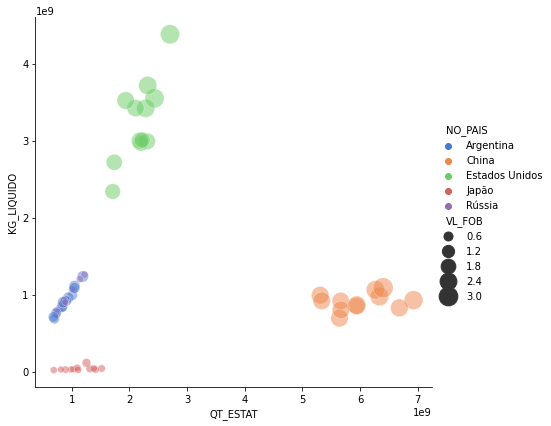

In [70]:
sns.relplot(x="QT_ESTAT", y="KG_LIQUIDO", hue="NO_PAIS", size="VL_FOB",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=g29)

###### Países que mais exportaram para o Brasil (em valor)

In [14]:
g27=g25.sort_values(by=["VL_FOB"],ascending=False)
g27.head(10)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,% QT_ESTAT,% VL_FOB
NO_PAIS,,,,,
China,72089621346,10934579320,33181710939,30.511299,18.955505
Estados Unidos,26123393073,39041458732,30050812077,11.056497,17.166936
Argentina,10763788980,11065193611,10551207327,4.555679,6.027521
Alemanha,3268485973,2194436594,10271166715,1.383358,5.867544
Brasil,309408531,426011850,7018629366,0.130954,4.009488
Coreia do Sul,10347321644,889856486,4702835261,4.379413,2.686559
Índia,1694366757,1892561047,4254651595,0.717126,2.430528
México,1532967532,819890629,4196090562,0.648815,2.397074
Japão,13494574298,478791010,4091379256,5.711460,2.337256


In [15]:
#Criação de coluna adicional com o somatório acumulado do valor, o que facilita identificar a representatividade dos principais exportadores.
g27["% VL_FOB ACUM"]=g27["% VL_FOB"].cumsum()
#Reordenando as colunas para melhor compreensão
g27=g27[["KG_LIQUIDO","QT_ESTAT", "% QT_ESTAT", "VL_FOB", "% VL_FOB", "% VL_FOB ACUM"]]
g27.head(15)

,KG_LIQUIDO,QT_ESTAT,% QT_ESTAT,VL_FOB,% VL_FOB,% VL_FOB ACUM
NO_PAIS,,,,,,
China,10934579320,72089621346,30.511299,33181710939,18.955505,18.955505
Estados Unidos,39041458732,26123393073,11.056497,30050812077,17.166936,36.122441
Argentina,11065193611,10763788980,4.555679,10551207327,6.027521,42.149962
Alemanha,2194436594,3268485973,1.383358,10271166715,5.867544,48.017507
Brasil,426011850,309408531,0.130954,7018629366,4.009488,52.026994
Coreia do Sul,889856486,10347321644,4.379413,4702835261,2.686559,54.713553
Índia,1892561047,1694366757,0.717126,4254651595,2.430528,57.144081
México,819890629,1532967532,0.648815,4196090562,2.397074,59.541155
Japão,478791010,13494574298,5.711460,4091379256,2.337256,61.878411


###### Na sequência, pretende-se identifcar os códigos NCM mais recorrentemente exportados, para o Brasil,  por cada um dos países.

In [16]:
g30=df9.groupby(['NO_PAIS','CO_NCM']).size().reset_index().rename(columns={0:'contagem1'})
g30.sort_values(by=["NO_PAIS","contagem1"],ascending=False)

,NO_PAIS,CO_NCM,contagem1
98708,Índia,39269090,259
99511,Índia,73181500,252
100477,Índia,87089990,239
99540,Índia,73269090,231
98769,Índia,40169990,228
...,...,...,...
52,Afeganistão,87084090,1
55,Afeganistão,90318099,1
56,Afeganistão,90329099,1
0,A Designar,39269090,1


In [17]:
g30.groupby(["NO_PAIS"], sort=False)["contagem1"].max()

NO_PAIS
A Designar         1
Afeganistão       17
Aland, Ilhas       2
Albânia           22
Alemanha         631
                ... 
Zimbábue           3
Zâmbia             3
África do Sul     73
Áustria          262
Índia            259
Name: contagem1, Length: 227, dtype: int64

In [18]:
idx3 = g30.groupby(["NO_PAIS"])["contagem1"].transform(max) == g30["contagem1"]

In [19]:
# Códigos NCM mais recorrentemente exportados por cada país (no caso de haver NCM igualmente recorrentes, ambos aparecerão na listagem)
g31=g30[idx3]
g31.sort_values(by=["contagem1"],ascending=False)

,NO_PAIS,CO_NCM,contagem1
17912,China,39269090,1299
37853,Estados Unidos,73181500,865
1909,Alemanha,39269090,631
55872,Itália,73181500,581
88024,Taiwan (Formosa),73181500,507
...,...,...,...
12881,Cabo Verde,85437099,1
64492,Montserrat,85369090,1
64395,Micronésia,3077100,1
15048,Chade,29033911,1


Listagem com as mercadorias (códigos NCM e respectivas descrições) mais recorrentemente exportadas, para o Brasil, por cada um dos países (em outras palavras, as que mais contêm registros no dataset principal - seja por aparecerem em um maior número de meses, ou por chegarem por modais diferentes, em URF distintas, etc.) por cada país em 2019

In [23]:
g32=pd.merge(g31, CO_NCM, how='left', on=['CO_NCM'])
g32.sort_values(by=["contagem1"],ascending=False).head(30)

,NO_PAIS,CO_NCM,contagem1,NO_NCM_POR
58,China,39269090,1299,Outras obras de plásticos
91,Estados Unidos,73181500,865,"Outros parafusos e pinos ou pernos, mesmo com ..."
5,Alemanha,39269090,631,Outras obras de plásticos
132,Itália,73181500,581,"Outros parafusos e pinos ou pernos, mesmo com ..."
259,Taiwan (Formosa),73181500,507,"Outros parafusos e pinos ou pernos, mesmo com ..."
99,França,39269090,441,Outras obras de plásticos
57,Chile,22042100,420,"Outros vinhos, mostos de uvas, fermentados, im..."
179,México,85365090,390,"Outros interruptores, etc, de circuitos elétri..."
138,Japão,85365090,389,"Outros interruptores, etc, de circuitos elétri..."
215,Reino Unido,39269090,358,Outras obras de plásticos


In [24]:
# A análise realizada acima leva em conta as NCM mais recorrentemente exportadas para o Brasil e não as mais exportadas em quantidade.
# Na sequência, segue nova análise em que se levará em conta a maior quantidade exportada na unidade de medida estatística (QT_ESTAT)
g33=df9.groupby(['NO_PAIS','CO_NCM']).sum().reset_index()
g33.sort_values(by=["QT_ESTAT"],ascending=False).head()

,NO_PAIS,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
21251,China,85322410,1582.333135,1575.379257,21443138404,395639,96325634
21263,China,85332120,1497.104702,1489.645679,17582214909,280919,25187149
60576,Japão,85322410,1135.609054,1131.280877,7412198210,97658,30611101
34773,Estados Unidos,27011200,227.651820,227.110603,7233252111,7233252111,1154104234
5399,Argentina,10019900,811.076500,805.604359,5392406941,5392406941,1238361817


In [25]:
# identificando os valores máximos de QT_ESTAT por país (independentemente de a qual NCM se referem)
g33.groupby(["NO_PAIS"], sort=False)["QT_ESTAT"].max()

NO_PAIS
A Designar             2161
Afeganistão           40000
Aland, Ilhas          22500
Albânia               99692
Alemanha         1014559813
                    ...    
Zimbábue             270000
Zâmbia              3507592
África do Sul     486734850
Áustria            62745002
Índia             301122569
Name: QT_ESTAT, Length: 227, dtype: int64

In [26]:
# obtendo os índices em que o df "g33 (que já é o agrupodo por PAÍS e NCM) groupby ["NO_PAIS"]" apresenta os maiores valores para (somatório) da QT_ESTAT 
idx4=g33.groupby(["NO_PAIS"])["QT_ESTAT"].transform(max)==g33["QT_ESTAT"]

In [27]:
# filtrando o df g33 pelos índices correspondentes aos máximas QT_ESTAT por País (que retornarão, portanto, a qual código NCM se referem)
g33[idx4].sort_values(by=["QT_ESTAT"],ascending=False).head()

,NO_PAIS,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
21251,China,85322410,1582.333135,1575.379257,21443138404,395639,96325634
60576,Japão,85322410,1135.609054,1131.280877,7412198210,97658,30611101
34773,Estados Unidos,27011200,227.651820,227.110603,7233252111,7233252111,1154104234
5399,Argentina,10019900,811.076500,805.604359,5392406941,5392406941,1238361817
8621,Bolívia,27112100,71.327711,70.831154,5205692412,5205692412,1292978019


In [28]:
# Listagem com os códigos NCM mais exportados para o Brasil (maior soma de QT_ESTAT) por cada um dos países em 2019
g34=g33[idx4].drop(columns=["câmbio_mês_atual","câmbio_mês_anterior", "KG_LIQUIDO", "VL_FOB"])
g34.sort_values(by=["QT_ESTAT"],ascending=False).head()

,NO_PAIS,CO_NCM,QT_ESTAT
21251,China,85322410,21443138404
60576,Japão,85322410,7412198210
34773,Estados Unidos,27011200,7233252111
5399,Argentina,10019900,5392406941
8621,Bolívia,27112100,5205692412


###### Listagem contendo as mercadorias mais exportadas de cada país para o Brasil (destaque-se que aparecem apenas A mercadoria mais exportada - quantidade - de cada país, ou seja, apenas uma mercadoria por país).

In [29]:
g35=pd.merge(g34, CO_NCM, how='left', on=['CO_NCM'])
g35.sort_values(by=["QT_ESTAT"],ascending=False).head(50)

,NO_PAIS,CO_NCM,QT_ESTAT,NO_NCM_POR
41,China,85322410,21443138404,"Outros condensadores fixos, com dielétrico de ..."
106,Japão,85322410,7412198210,"Outros condensadores fixos, com dielétrico de ..."
68,Estados Unidos,27011200,7233252111,"Hulha betuminosa, não aglomerada"
9,Argentina,10019900,5392406941,"Outros trigos e misturas de trigo com centeio,..."
22,Bolívia,27112100,5205692412,Gás natural no estado gasoso
46,Colômbia,27011200,4636360562,"Hulha betuminosa, não aglomerada"
51,Coreia do Sul,85322410,4510231320,"Outros condensadores fixos, com dielétrico de ..."
13,Austrália,27011200,4079447260,"Hulha betuminosa, não aglomerada"
197,Taiwan (Formosa),85332120,3534868197,"Resistências elétricas fixas, para potência nã..."
35,Canadá,31042090,3384102041,Outros cloretos de potássio


###### Na sequência, segue listagem com as exportações (por país e NCM) das maiores quantidades. Diferentemente da listagem anterior, no caso corrente não se restringiu a apenas um código NCM (o mais exportado em quantidade) de cada país.

In [31]:
#Aproveitando o df g33, já trabalhado anteriormente
g36=pd.merge(g33, CO_NCM, how='left', on=['CO_NCM']).drop(columns=["câmbio_mês_atual","câmbio_mês_anterior", "KG_LIQUIDO", "VL_FOB"])
g36.sort_values(by=["QT_ESTAT"],ascending=False).head(50)

,NO_PAIS,CO_NCM,QT_ESTAT,NO_NCM_POR
21251,China,85322410,21443138404,"Outros condensadores fixos, com dielétrico de ..."
21263,China,85332120,17582214909,"Resistências elétricas fixas, para potência nã..."
60576,Japão,85322410,7412198210,"Outros condensadores fixos, com dielétrico de ..."
34773,Estados Unidos,27011200,7233252111,"Hulha betuminosa, não aglomerada"
5399,Argentina,10019900,5392406941,"Outros trigos e misturas de trigo com centeio,..."
8621,Bolívia,27112100,5205692412,Gás natural no estado gasoso
23367,Colômbia,27011200,4636360562,"Hulha betuminosa, não aglomerada"
26166,Coreia do Sul,85322410,4510231320,"Outros condensadores fixos, com dielétrico de ..."
7396,Austrália,27011200,4079447260,"Hulha betuminosa, não aglomerada"
88999,Taiwan (Formosa),85332120,3534868197,"Resistências elétricas fixas, para potência nã..."


Na sequência, segue nova análise em que se levará em conta A mercadoria (apenas uma por país) de cada país cujas exportações perfazem o maior valor FOB.

In [32]:
#Aproveitando o df g33, já trabalhado anteriormente
# identificando os valores máximos de VL_FOB por país (independentemente de a qual NCM se referem)
g33.groupby(["NO_PAIS"], sort=False)["VL_FOB"].max()

NO_PAIS
A Designar            1726
Afeganistão         158619
Aland, Ilhas         31462
Albânia             315903
Alemanha         338345117
                   ...    
Zimbábue            288442
Zâmbia            22495269
África do Sul    152256665
Áustria           73076880
Índia            413817024
Name: VL_FOB, Length: 227, dtype: int64

In [33]:
# obtendo os índices em que o df "g33 (que já é o agrupodo por PAÍS e NCM) groupby ["NO_PAIS"]" apresenta os maiores valores para (somatório) do VL_FOB 
idx5=g33.groupby(["NO_PAIS"])["VL_FOB"].transform(max)==g33["VL_FOB"]

In [34]:
# filtrando o df g33 pelos índices correspondentes aos máximas VL_FOB por País (que retornarão, portanto, a qual código NCM se referem)
g33[idx5].sort_values(by=["VL_FOB"],ascending=False).head()

,NO_PAIS,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
34801,Estados Unidos,27101921,584.756471,581.626336,12980272,9141687656,5506505475
9484,Brasil,83071090,254.141975,253.075839,248529661,248529661,3091606121
7048,Argentina,87042190,315.577908,314.232054,94700,202985793,2497269988
7264,Arábia Saudita,27090010,43.247309,42.988277,3895815,3332467565,1541425062
8621,Bolívia,27112100,71.327711,70.831154,5205692412,5205692412,1292978019


In [36]:
# Listagem com os códigos NCM mais valiosos exportados para o Brasil (maior soma de VL_FOB) por cada um dos países em 2019
g37=g33[idx5].drop(columns=["câmbio_mês_atual","câmbio_mês_anterior", "KG_LIQUIDO", "QT_ESTAT"])
g37.sort_values(by=["VL_FOB"],ascending=False).head()

,NO_PAIS,CO_NCM,VL_FOB
34801,Estados Unidos,27101921,5506505475
9484,Brasil,83071090,3091606121
7048,Argentina,87042190,2497269988
7264,Arábia Saudita,27090010,1541425062
8621,Bolívia,27112100,1292978019


###### Listagem contendo as mercadorias mais valiosas exportadas de cada país para o Brasil (destaque-se que aparecem apenas A mercadoria mais valiosa exportada - VL_FOB - de cada país, ou seja, apenas uma mercadoria por país).

In [37]:
g38=pd.merge(g37, CO_NCM, how='left', on=['CO_NCM'])
g38.sort_values(by=["VL_FOB"],ascending=False).head(50)

,NO_PAIS,CO_NCM,VL_FOB,NO_NCM_POR
68,Estados Unidos,27101921,5506505475,Gasóleo (óleo diesel)
25,Brasil,83071090,3091606121,Outros tubos flexíveis de ferro ou aço
9,Argentina,87042190,2497269988,"Outros veículos automóveis com motor diesel, p..."
12,Arábia Saudita,27090010,1541425062,Óleos brutos de petróleo
22,Bolívia,27112100,1292978019,Gás natural no estado gasoso
41,China,85299020,1188225021,Outras partes para aparelhos receptores de rad...
35,Canadá,31042090,1121768519,Outros cloretos de potássio
10,Argélia,27090010,1113819029,Óleos brutos de petróleo
171,Rússia,31042090,979770318,Outros cloretos de potássio
218,Vietnã,85177099,960606519,Outras partes para aparelhos de telefonia/tele...


###### Listagem contendo as mercadorias mais valiosas exportadas de cada país para o Brasil. Diferentemente da listagem anterior, aqui não se restringe a apenas uma mercadoria (um código NCM) por país. As mercadorias foram ordenadas pelo somatório do VL_FOB, independentemente do país de que vieram.

In [40]:
#Aproveitando o df g33, já trabalhado anteriormente
g39=pd.merge(g33, CO_NCM, how='left', on=['CO_NCM']).drop(columns=["câmbio_mês_atual","câmbio_mês_anterior", "KG_LIQUIDO", "QT_ESTAT"])
g39.sort_values(by=["VL_FOB"],ascending=False).head(50)

,NO_PAIS,CO_NCM,VL_FOB,NO_NCM_POR
34801,Estados Unidos,27101921,5506505475,Gasóleo (óleo diesel)
9484,Brasil,83071090,3091606121,Outros tubos flexíveis de ferro ou aço
7048,Argentina,87042190,2497269988,"Outros veículos automóveis com motor diesel, p..."
9954,Brasil,89052000,1709212920,"Plataformas de perfuração ou de exploração, fl..."
7264,Arábia Saudita,27090010,1541425062,Óleos brutos de petróleo
9665,Brasil,84818099,1405132753,"Torneiras, e dispositivos semelhantes, para ca..."
34796,Estados Unidos,27101259,1354773029,"Outras gasolinas, exceto para aviação"
8621,Bolívia,27112100,1292978019,Gás natural no estado gasoso
5399,Argentina,10019900,1238361817,"Outros trigos e misturas de trigo com centeio,..."
21229,China,85299020,1188225021,Outras partes para aparelhos receptores de rad...


Na sequência, busca-se identificar quais são os fluxos mais recorrentes de importações, ou seja, quais os pares "país exportador + UF importadora" que mais se repetem.

In [3]:
g40=df9

In [4]:
g40["PAIS-UF"]=g40["NO_PAIS"]+ " - " + g40["SG_UF_NCM"]

In [5]:
g40.head()

,ANO-MES,CO_NCM,NO_NCM_POR,SG_UF_NCM,SG_UNID,NO_PAIS,NO_VIA,NO_URF,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB,PAIS-UF
0,2019-12,85044021,"Retificadores, exceto carregadores de acumulad...",SP,UNID.,Estados Unidos,AEREA,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,4.108924,4.154725,53,44,8263,Estados Unidos - SP
1,2019-12,85183000,"Fones de ouvido, mesmo combinados com um micro...",GO,UNID.,China,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,4.108924,4.154725,23734,1621,6987,China - GO
2,2019-12,39263000,"Guarnições para móveis, carrocerias e semelhan...",SP,KGL,Alemanha,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,3951,3951,88311,Alemanha - SP
3,2019-12,38249929,Outros derivados de ácidos graxos industriais;...,SP,KGL,México,MARITIMA,0817800 - PORTO DE SANTOS,4.108924,4.154725,19540,19540,65812,México - SP
4,2019-12,34021300,"Agentes orgânicos de superfície, não iônicos",BA,KGL,México,MARITIMA,0517800 - ALF - SALVADOR,4.108924,4.154725,34400,34400,119356,México - BA


In [6]:
g41=g40["PAIS-UF"].value_counts()

In [10]:
g41

,PAIS-UF
China - SP,86096
Estados Unidos - SP,77425
Alemanha - SP,59748
China - SC,54565
Itália - SP,36981
...,...
Jamaica - RS,1
Costa Rica - SE,1
Noruega - DF,1
Guiana - RR,1


In [11]:
g41.reset_index(inplace=True)

In [12]:
g41["% PAIS-UF"]=(g41["PAIS-UF"]/(g41["PAIS-UF"].sum()))*100

In [15]:
g41["% PAIS-UF ACUMULADO"]=g41["% PAIS-UF"].cumsum()

In [16]:
g41.sort_values(by="% PAIS-UF",ascending=False).head(50)

,index,PAIS-UF,% PAIS-UF,% PAIS-UF ACUMULADO
0,China - SP,86096,4.879528,4.879528
1,Estados Unidos - SP,77425,4.388095,9.267623
2,Alemanha - SP,59748,3.386244,12.653867
3,China - SC,54565,3.092495,15.746362
4,Itália - SP,36981,2.095914,17.842276
5,Japão - SP,32963,1.868192,19.710468
6,França - SP,27856,1.578751,21.289219
7,China - PR,26895,1.524286,22.813504
8,China - MG,25679,1.455368,24.268873
9,China - RS,25404,1.439783,25.708655


# Análises referentes às Unidades da Receita Federal do Brasil de registro das declarações de importação (coluna NO_URF)

In [22]:
g42=df9.groupby("NO_URF").sum()
g42.drop(columns=["CO_NCM","câmbio_mês_atual","câmbio_mês_anterior"],inplace=True)
g42.sort_values(by=["QT_ESTAT"],ascending=False).head(50)

,QT_ESTAT,KG_LIQUIDO,VL_FOB
NO_URF,,,
0817800 - PORTO DE SANTOS,36855697796,26467668119,49561114965
0227700 - AEROPORTO EDUARDO GOMES,30419678435,18835732,4110789387
0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,26688934379,73688036,11190083742
0227600 - PORTO DE MANAUS,17162523902,2490130218,5614188761
0917800 - PORTO DE PARANAGUA,15795545591,16618044081,12596550329
0727600 - PORTO DE VITORIA,13746661805,14133009946,9666069791
0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO/GUARULHOS,11360597515,95428074,9925584455
0717800 - PORTO DE ITAGUAI,8794930489,10958645279,4851141370
0927700 - PORTO DE SAO FRANCISCO DO SUL,8603092530,5275886043,6501795231


###### Unidades da RFB ordenadas pela maior quantidade de mercadoria na unidade de medida estatística

In [25]:
#criando colunas adicionais com os percentuais:
g42["% QT_ESTAT"]=(g42["QT_ESTAT"]/(g42["QT_ESTAT"].sum()))*100
g42["% KG_LIQUIDO"]=(g42["KG_LIQUIDO"]/(g42["KG_LIQUIDO"].sum()))*100
g42["% VL_FOB"]=(g42["VL_FOB"]/(g42["VL_FOB"].sum()))*100
g42.sort_values(by=["QT_ESTAT"],ascending=False).head(50)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,% QT_ESTAT,% KG_LIQUIDO,% VL_FOB
NO_URF,,,,,,
0817800 - PORTO DE SANTOS,36855697796,26467668119,49561114965,15.598851,17.306210,28.312463
0227700 - AEROPORTO EDUARDO GOMES,30419678435,18835732,4110789387,12.874862,0.012316,2.348345
0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,26688934379,73688036,11190083742,11.295857,0.048182,6.392488
0227600 - PORTO DE MANAUS,17162523902,2490130218,5614188761,7.263888,1.628202,3.207182
0917800 - PORTO DE PARANAGUA,15795545591,16618044081,12596550329,6.685326,10.865912,7.195951
0727600 - PORTO DE VITORIA,13746661805,14133009946,9666069791,5.818154,9.241042,5.521874
0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO/GUARULHOS,11360597515,95428074,9925584455,4.808273,0.062397,5.670126
0717800 - PORTO DE ITAGUAI,8794930489,10958645279,4851141370,3.722377,7.165445,2.771281
0927700 - PORTO DE SAO FRANCISCO DO SUL,8603092530,5275886043,6501795231,3.641183,3.449703,3.714239


###### Unidades da RFB ordenadas pelo maior peso de mercadoria importada (somatório KG_LIQUIDO)

In [26]:
g42.sort_values(by=["KG_LIQUIDO"],ascending=False).head(50)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,% QT_ESTAT,% KG_LIQUIDO,% VL_FOB
NO_URF,,,,,,
0817800 - PORTO DE SANTOS,36855697796,26467668119,49561114965,15.598851,17.306210,28.312463
0917800 - PORTO DE PARANAGUA,15795545591,16618044081,12596550329,6.685326,10.865912,7.195951
0727600 - PORTO DE VITORIA,13746661805,14133009946,9666069791,5.818154,9.241042,5.521874
0717800 - PORTO DE ITAGUAI,8794930489,10958645279,4851141370,3.722377,7.165445,2.771281
0320151 - IRF - PORTO DE SÃO LUÍS,5505067269,9674821838,3738889555,2.329971,6.326001,2.135892
0517800 - ALF - SALVADOR,6531722030,9200703927,6197151717,2.764494,6.015993,3.540207
1017700 - PORTO DE RIO GRANDE,7587866291,7804748478,4879432578,3.211498,5.103231,2.787442
0417902 - IRF - PORTO DE SUAPE,3416764938,6427414132,4594899781,1.446116,4.202644,2.624899
0927700 - PORTO DE SAO FRANCISCO DO SUL,8603092530,5275886043,6501795231,3.641183,3.449703,3.714239


###### Unidades da RFB ordenadas pelo maior valor de mercadoria importada (somatório VL_FOB)

In [27]:
g42.sort_values(by=["VL_FOB"],ascending=False).head(50)

,QT_ESTAT,KG_LIQUIDO,VL_FOB,% QT_ESTAT,% KG_LIQUIDO,% VL_FOB
NO_URF,,,,,,
0817800 - PORTO DE SANTOS,36855697796,26467668119,49561114965,1.559885e+01,17.306210,28.312463
0917800 - PORTO DE PARANAGUA,15795545591,16618044081,12596550329,6.685326e+00,10.865912,7.195951
0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,26688934379,73688036,11190083742,1.129586e+01,0.048182,6.392488
0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO/GUARULHOS,11360597515,95428074,9925584455,4.808273e+00,0.062397,5.670126
0727600 - PORTO DE VITORIA,13746661805,14133009946,9666069791,5.818154e+00,9.241042,5.521874
0927800 - ITAJAI,7176842938,3372363395,8589802801,3.037536e+00,2.205061,4.907042
0717600 - PORTO DO RIO DE JANEIRO,3279195339,2993262293,7080148934,1.387891e+00,1.957181,4.044632
0927700 - PORTO DE SAO FRANCISCO DO SUL,8603092530,5275886043,6501795231,3.641183e+00,3.449703,3.714239
0517800 - ALF - SALVADOR,6531722030,9200703927,6197151717,2.764494e+00,6.015993,3.540207


In [54]:
# Destaque-se que as 15 principais URF em termos de VL_FOB representam 85,17% do valor importado pelo Brasil em 2019:
URFtopVLFOB=g42.sort_values(by=["VL_FOB"],ascending=False).head(15)

In [56]:
URFtopVLFOB["% VL_FOB ACUMULADO"]= URFtopVLFOB["% VL_FOB"].cumsum()
URFtopVLFOB

,QT_ESTAT,KG_LIQUIDO,VL_FOB,% QT_ESTAT,% KG_LIQUIDO,% VL_FOB,% VL_FOB ACUMULADO
NO_URF,,,,,,,
0817800 - PORTO DE SANTOS,36855697796,26467668119,49561114965,15.598851,17.306210,28.312463,28.312463
0917800 - PORTO DE PARANAGUA,15795545591,16618044081,12596550329,6.685326,10.865912,7.195951,35.508414
0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,26688934379,73688036,11190083742,11.295857,0.048182,6.392488,41.900902
0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO/GUARULHOS,11360597515,95428074,9925584455,4.808273,0.062397,5.670126,47.571028
0727600 - PORTO DE VITORIA,13746661805,14133009946,9666069791,5.818154,9.241042,5.521874,53.092902
0927800 - ITAJAI,7176842938,3372363395,8589802801,3.037536,2.205061,4.907042,57.999944
0717600 - PORTO DO RIO DE JANEIRO,3279195339,2993262293,7080148934,1.387891,1.957181,4.044632,62.044576
0927700 - PORTO DE SAO FRANCISCO DO SUL,8603092530,5275886043,6501795231,3.641183,3.449703,3.714239,65.758815
0517800 - ALF - SALVADOR,6531722030,9200703927,6197151717,2.764494,6.015993,3.540207,69.299022


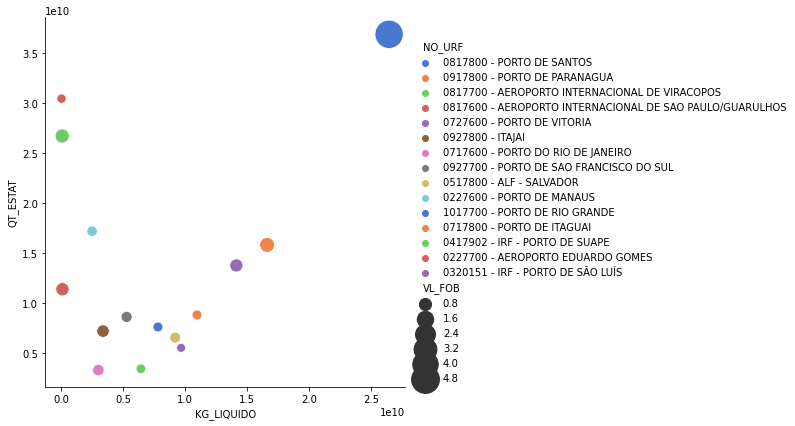

In [57]:
sns.relplot(x="KG_LIQUIDO", y="QT_ESTAT", hue="NO_URF", size="VL_FOB",
            sizes=(80, 800), palette="muted",
            height=6, data=URFtopVLFOB)

Destaque-se que os maiores pesos (eixo x) importados estão concentrados nas URF que jurisdicionam os portos (vide, por exemplo, os Portos de Santos, Paranaguá e Vitória, todos eles mais à direita do gráfico). Por outro lado, as URF jurisdicionantes dos aeroportos concentram importações de valores igualmente relevantes (tamanho da circunferência), porém, de menor peso (vide, por exemplo, as Alfândegas dos Aeroportos de Viracopos, de São Paulo/Guarulhos e Eduardo Gomes, que estão bastante à esquerda do gráfico).

###### Na sequência, serão identificadas as mercadorias mais recorrentemente importadas por cada URF, as mais importadas (em quantidade) e as mais valiosas (VL_FOB).

In [4]:
g43=df9.groupby(['NO_URF','CO_NCM']).size().reset_index().rename(columns={0:'contagem2'})
g43.sort_values(by=["NO_URF","contagem2"],ascending=False)

,NO_URF,CO_NCM,contagem2
82084,1017900 - ALF - SANTANA DO LIVRAMENTO,30049049,44
82086,1017900 - ALF - SANTANA DO LIVRAMENTO,30049069,35
82053,1017900 - ALF - SANTANA DO LIVRAMENTO,11010010,31
82044,1017900 - ALF - SANTANA DO LIVRAMENTO,8051000,29
82054,1017900 - ALF - SANTANA DO LIVRAMENTO,11071010,28
...,...,...,...
1364,0000000 - NAO INFORMADO,94032000,1
1366,0000000 - NAO INFORMADO,94041000,1
1373,0000000 - NAO INFORMADO,94059200,1
1386,0000000 - NAO INFORMADO,95049090,1


In [10]:
g43.groupby(["NO_URF"], sort=False)["contagem2"].max()

NO_URF
0000000 - NAO INFORMADO                                  278
0117600 - AEROPORTO INTERNACIONAL DE BRASILIA            112
0130100 - CUIABA                                           9
0130151 - CACERES                                         17
0140100 - CAMPO GRANDE                                     1
                                                        ... 
1017700 - PORTO DE RIO GRANDE                            299
1017701 - IRF - CHUÍ                                      42
1017800 - ALF - PORTO ALEGRE                              35
1017801 - IRF - AEROPORTO INTERNACIONAL SALGADO FILHO    245
1017900 - ALF - SANTANA DO LIVRAMENTO                     44
Name: contagem2, Length: 95, dtype: int64

In [11]:
idx6 = g43.groupby(["NO_URF"])["contagem2"].transform(max) == g43["contagem2"]

In [12]:
# Códigos NCM mais recorrentemente importados em cada URF (no caso de haver NCM igualmente recorrentes, ambos aparecerão na listagem)
g43=g43[idx6]
g43.sort_values(by=["contagem2"],ascending=False)

,NO_URF,CO_NCM,contagem2
49738,0817800 - PORTO DE SANTOS,39269090,2360
37626,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,39269090,1715
46147,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,85365090,1118
56593,0917800 - PORTO DE PARANAGUA,39269090,601
26463,0717600 - PORTO DO RIO DE JANEIRO,87089990,543
...,...,...,...
11304,0417800 - PORTO DE SUAPE,84678900,1
11303,0417800 - PORTO DE SUAPE,84671190,1
11302,0417800 - PORTO DE SUAPE,84669340,1
11301,0417800 - PORTO DE SUAPE,84440090,1


###### Listagem com as mercadorias (códigos NCM e respectivas descrições) mais recorrentemente importados em cada uma das URF (em outras palavras, as que mais contêm registros no dataset principal - seja por aparecerem em um maior número de meses, ou por chegarem por modais diferentes, provenientes de países distintos, etc.)

In [15]:
g44=pd.merge(g43, CO_NCM, how='left', on=['CO_NCM'])
g44.sort_values(by=["contagem2"],ascending=False).head(30)

,NO_URF,CO_NCM,contagem2,NO_NCM_POR
102,0817800 - PORTO DE SANTOS,39269090,2360,Outras obras de plásticos
100,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,39269090,1715,Outras obras de plásticos
101,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,85365090,1118,"Outros interruptores, etc, de circuitos elétri..."
107,0917800 - PORTO DE PARANAGUA,39269090,601,Outras obras de plásticos
94,0717600 - PORTO DO RIO DE JANEIRO,87089990,543,Outras partes e acessórios para tratores e veí...
122,0927700 - PORTO DE SAO FRANCISCO DO SUL,39269090,535,Outras obras de plásticos
123,0927800 - ITAJAI,39269090,529,Outras obras de plásticos
95,0717700 - AEROPORTO INTERNACIONAL DO RIO DE JA...,73269090,500,Outras obras de ferro ou aço
85,0517800 - ALF - SALVADOR,39269090,435,Outras obras de plásticos
108,0917900 - ALF - CURITIBA,85369090,413,"Outros aparelhos para interrupção, etc, para c..."


In [16]:
# A análise realizada acima leva em conta as NCM mais recorrentemente importadas em cada URF
# Na sequência, segue nova análise em que se levará em conta a maior quantidade importada na unidade de medida estatística (QT_ESTAT)
g45=df9.groupby(['NO_URF','CO_NCM']).sum().reset_index()
g45.sort_values(by=["QT_ESTAT"],ascending=False).head()

,NO_URF,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
7917,0227700 - AEROPORTO EDUARDO GOMES,85322410,870.896027,866.455811,12964323557,231575,59274142
46085,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,85322410,2385.489479,2370.835612,12441204216,145366,40036446
33599,0727600 - PORTO DE VITORIA,27011200,292.407739,290.853369,9121448358,9121448358,1493460161
7927,0227700 - AEROPORTO EDUARDO GOMES,85332120,760.763501,757.784421,8094388731,115291,12579848
5752,0227600 - PORTO DE MANAUS,85322410,520.018831,517.405192,5690786723,117317,31866546


In [19]:
# identificando os valores máximos de QT_ESTAT por URF (independentemente de a qual NCM se referem)
g45.groupby(["NO_URF"], sort=False)["QT_ESTAT"].max()

NO_URF
0000000 - NAO INFORMADO                                     6132275
0117600 - AEROPORTO INTERNACIONAL DE BRASILIA               1295832
0130100 - CUIABA                                             728000
0130151 - CACERES                                         403440690
0140100 - CAMPO GRANDE                                         3500
                                                            ...    
1017700 - PORTO DE RIO GRANDE                            1514866658
1017701 - IRF - CHUÍ                                       14403603
1017800 - ALF - PORTO ALEGRE                              174758450
1017801 - IRF - AEROPORTO INTERNACIONAL SALGADO FILHO     118266064
1017900 - ALF - SANTANA DO LIVRAMENTO                       9954313
Name: QT_ESTAT, Length: 95, dtype: int64

In [20]:
# obtendo os índices em que o df "g45 (que já é o agrupodo por URF e NCM) groupby ["NO_URF"]" apresenta os maiores valores para (somatório) da QT_ESTAT 
idx7=g45.groupby(["NO_URF"])["QT_ESTAT"].transform(max)==g45["QT_ESTAT"]

In [21]:
# filtrando o df g45 pelos índices correspondentes aos máximas QT_ESTAT por URF (que retornarão, portanto, a qual código NCM se referem)
g45[idx7].sort_values(by=["QT_ESTAT"],ascending=False).head()

,NO_URF,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
7917,0227700 - AEROPORTO EDUARDO GOMES,85322410,870.896027,866.455811,12964323557,231575,59274142
46085,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,85322410,2385.489479,2370.835612,12441204216,145366,40036446
33599,0727600 - PORTO DE VITORIA,27011200,292.407739,290.853369,9121448358,9121448358,1493460161
5752,0227600 - PORTO DE MANAUS,85322410,520.018831,517.405192,5690786723,117317,31866546
2296,0147600 - ALF - CORUMBÁ,27112100,47.333696,47.109177,4802251722,4802251722,1264810912


In [22]:
# Listagem com os códigos NCM mais importados por cada uma das URF (maior soma de QT_ESTAT) em 2019
g46=g45[idx7].drop(columns=["câmbio_mês_atual","câmbio_mês_anterior", "KG_LIQUIDO", "VL_FOB"])
g46.sort_values(by=["QT_ESTAT"],ascending=False).head()

,NO_URF,CO_NCM,QT_ESTAT
7917,0227700 - AEROPORTO EDUARDO GOMES,85322410,12964323557
46085,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,85322410,12441204216
33599,0727600 - PORTO DE VITORIA,27011200,9121448358
5752,0227600 - PORTO DE MANAUS,85322410,5690786723
2296,0147600 - ALF - CORUMBÁ,27112100,4802251722


###### Listagem contendo a mercadoria importada em maior quantidade em cada URF em 2019

In [23]:
g47=pd.merge(g46, CO_NCM, how='left', on=['CO_NCM'])
g47.sort_values(by=["QT_ESTAT"],ascending=False).head(50)

,NO_URF,CO_NCM,QT_ESTAT,NO_NCM_POR
18,0227700 - AEROPORTO EDUARDO GOMES,85322410,12964323557,"Outros condensadores fixos, com dielétrico de ..."
64,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,85322410,12441204216,"Outros condensadores fixos, com dielétrico de ..."
60,0727600 - PORTO DE VITORIA,27011200,9121448358,"Hulha betuminosa, não aglomerada"
17,0227600 - PORTO DE MANAUS,85322410,5690786723,"Outros condensadores fixos, com dielétrico de ..."
7,0147600 - ALF - CORUMBÁ,27112100,4802251722,Gás natural no estado gasoso
59,0717800 - PORTO DE ITAGUAI,27011200,4310041948,"Hulha betuminosa, não aglomerada"
63,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,85322410,3893028840,"Outros condensadores fixos, com dielétrico de ..."
65,0817800 - PORTO DE SANTOS,85332120,2710967549,"Resistências elétricas fixas, para potência nã..."
70,0917800 - PORTO DE PARANAGUA,31042090,2634149627,Outros cloretos de potássio
29,0317900 - ALF - FORTALEZA,27011200,2283450681,"Hulha betuminosa, não aglomerada"


In [28]:
# Aproveitando o df g45, já trabalhado anteriormente
# Identificando os valores máximos de VL_FOB por URF (independentemente de a qual NCM se referem)
g45.groupby(["NO_URF"], sort=False)["VL_FOB"].max()

NO_URF
0000000 - NAO INFORMADO                                    31056852
0117600 - AEROPORTO INTERNACIONAL DE BRASILIA             240590546
0130100 - CUIABA                                             780492
0130151 - CACERES                                          28167107
0140100 - CAMPO GRANDE                                         5005
                                                            ...    
1017700 - PORTO DE RIO GRANDE                             478950739
1017701 - IRF - CHUÍ                                       39460206
1017800 - ALF - PORTO ALEGRE                             1346041033
1017801 - IRF - AEROPORTO INTERNACIONAL SALGADO FILHO      37846063
1017900 - ALF - SANTANA DO LIVRAMENTO                      28303918
Name: VL_FOB, Length: 95, dtype: int64

In [29]:
# obtendo os índices em que o df "g45 (que já é o agrupodo por URF e NCM) groupby ["NO_URF"]" apresenta os maiores valores para (somatório) do VL_FOB 
idx8=g45.groupby(["NO_URF"])["VL_FOB"].transform(max)==g45["VL_FOB"]

In [30]:
# filtrando o df g45 pelos índices correspondentes aos máximas VL_FOB por URF (que retornarão, portanto, a qual código NCM se referem)
g45[idx8].sort_values(by=["VL_FOB"],ascending=False).head()

,NO_URF,CO_NCM,câmbio_mês_atual,câmbio_mês_anterior,QT_ESTAT,KG_LIQUIDO,VL_FOB
34415,0727600 - PORTO DE VITORIA,83071090,134.793301,133.274147,166150150,166150150,2173624517
11116,0320151 - IRF - PORTO DE SÃO LUÍS,27101921,158.230668,157.926314,4112353,3419246155,2045916998
30966,0717800 - PORTO DE ITAGUAI,27090010,62.651229,62.237167,4639133,3974478055,1825459723
47652,0817800 - PORTO DE SANTOS,27101921,174.298119,172.870419,2920970,2427773826,1480672169
5740,0227600 - PORTO DE MANAUS,85299020,739.998163,736.695771,75675256,75675256,1415133181


In [31]:
# Listagem com os códigos NCM mais valiosos importados (maior soma de VL_FOB) por meio de cada umas das URF em 2019
g49=g45[idx8].drop(columns=["câmbio_mês_atual","câmbio_mês_anterior", "KG_LIQUIDO", "QT_ESTAT"])
g49.sort_values(by=["VL_FOB"],ascending=False).head()

,NO_URF,CO_NCM,VL_FOB
34415,0727600 - PORTO DE VITORIA,83071090,2173624517
11116,0320151 - IRF - PORTO DE SÃO LUÍS,27101921,2045916998
30966,0717800 - PORTO DE ITAGUAI,27090010,1825459723
47652,0817800 - PORTO DE SANTOS,27101921,1480672169
5740,0227600 - PORTO DE MANAUS,85299020,1415133181


###### Listagem contendo a mercadoria mais valiosa importada em cada URF em 2019

Listagem contendo as mercadorias mais valiosas importadas por meio de cada uma das URF em 2019 (destaque-se que aparecem apenas A mercadoria mais valiosa importada - VL_FOB - por meio de cada URF, ou seja, apenas uma mercadoria por URF).

In [32]:
g50=pd.merge(g49, CO_NCM, how='left', on=['CO_NCM'])
g50.sort_values(by=["VL_FOB"],ascending=False).head(50)

,NO_URF,CO_NCM,VL_FOB,NO_NCM_POR
59,0727600 - PORTO DE VITORIA,83071090,2173624517,Outros tubos flexíveis de ferro ou aço
33,0320151 - IRF - PORTO DE SÃO LUÍS,27101921,2045916998,Gasóleo (óleo diesel)
58,0717800 - PORTO DE ITAGUAI,27090010,1825459723,Óleos brutos de petróleo
64,0817800 - PORTO DE SANTOS,27101921,1480672169,Gasóleo (óleo diesel)
17,0227600 - PORTO DE MANAUS,85299020,1415133181,Outras partes para aparelhos receptores de rad...
47,0517800 - ALF - SALVADOR,27101241,1392469139,Naftas para petroquimica
69,0917800 - PORTO DE PARANAGUA,27101921,1368688121,Gasóleo (óleo diesel)
92,1017800 - ALF - PORTO ALEGRE,27101241,1346041033,Naftas para petroquimica
7,0147600 - ALF - CORUMBÁ,27112100,1264810912,Gás natural no estado gasoso
63,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,85177099,1230358733,Outras partes para aparelhos de telefonia/tele...


Listagem contendo as mercadorias mais valiosas importadas por meio de cada uma das URF em 2019. Diferentemente da listagem anterior, aqui não se restringe a apenas uma mercadoria (um código NCM) por URF. As mercadorias foram ordenadas pelo somatório do VL_FOB, independentemente de em qual URF a declaração de importação foi registrada.

In [26]:
g48=pd.merge(g45, CO_NCM, how='left', on=['CO_NCM']).drop(columns=["câmbio_mês_atual","câmbio_mês_anterior", "KG_LIQUIDO", "QT_ESTAT"])
g48.sort_values(by=["VL_FOB"],ascending=False).head(50)

,NO_URF,CO_NCM,VL_FOB,NO_NCM_POR
34415,0727600 - PORTO DE VITORIA,83071090,2173624517,Outros tubos flexíveis de ferro ou aço
35070,0727600 - PORTO DE VITORIA,89052000,2129727386,"Plataformas de perfuração ou de exploração, fl..."
11116,0320151 - IRF - PORTO DE SÃO LUÍS,27101921,2045916998,Gasóleo (óleo diesel)
30966,0717800 - PORTO DE ITAGUAI,27090010,1825459723,Óleos brutos de petróleo
33599,0727600 - PORTO DE VITORIA,27011200,1493460161,"Hulha betuminosa, não aglomerada"
47652,0817800 - PORTO DE SANTOS,27101921,1480672169,Gasóleo (óleo diesel)
5740,0227600 - PORTO DE MANAUS,85299020,1415133181,Outras partes para aparelhos receptores de rad...
15946,0517800 - ALF - SALVADOR,27101241,1392469139,Naftas para petroquimica
55516,0917800 - PORTO DE PARANAGUA,27101921,1368688121,Gasóleo (óleo diesel)
79484,1017800 - ALF - PORTO ALEGRE,27101241,1346041033,Naftas para petroquimica


# Análises referentes às taxas de câmbio (colunas "câmbio_mês_atual"	e "câmbio_mês_anterior")

In [78]:
g51=df9[["ANO-MES","câmbio_mês_atual","câmbio_mês_anterior"]]

In [79]:
g51.drop_duplicates(inplace=True)

<ipython-input-79-ab7be463e525>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g51.drop_duplicates(inplace=True)


In [82]:
g51.sort_values(by=["ANO-MES"],ascending=True,inplace=True)

<ipython-input-82-07428b0f4626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g51.sort_values(by=["ANO-MES"],ascending=True,inplace=True)


In [84]:
# variação do câmbio ao longo de 2019
g51

,ANO-MES,câmbio_mês_atual,câmbio_mês_anterior
17,2019-01,3.741055,3.884405
11497,2019-02,3.723025,3.741055
22701,2019-03,3.845884,3.723025
26221,2019-04,3.895557,3.845884
46286,2019-05,4.000918,3.895557
61809,2019-06,3.858226,4.000918
77630,2019-07,3.778713,3.858226
34980,2019-08,4.019382,3.778713
34977,2019-09,4.120900,4.019382
47579,2019-10,4.086387,4.120900


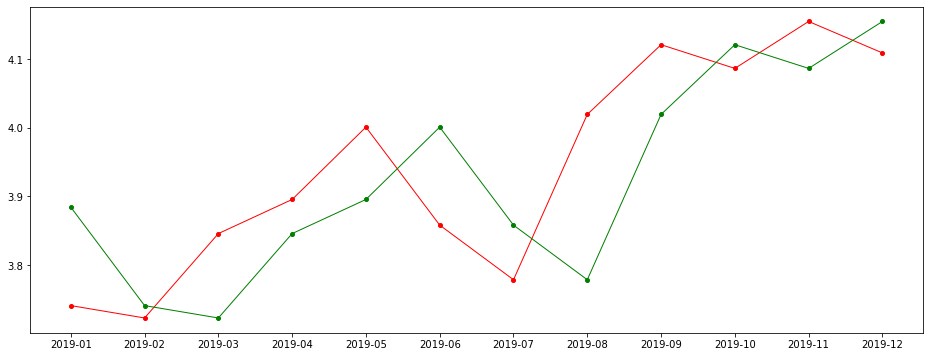

In [98]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(g51["ANO-MES"],g51["câmbio_mês_atual"], color="red", linewidth=1.00,marker='o', markersize=4)
ax.plot(g51["ANO-MES"],g51["câmbio_mês_anterior"], color="green", linewidth=1.00,marker='o', markersize=4)

In [105]:
g52=df9.groupby("ANO-MES").sum()

In [106]:
g52=g52.drop(columns=["CO_NCM","câmbio_mês_atual","câmbio_mês_anterior"])

In [108]:
#Acrescentando as taxas de câmbio ao dataframe g52, que contém os totais (quantidade, peso e valor) importados por mês em 2019
g53=pd.merge(g52, g51, how='left', on=['ANO-MES'])
g53

,ANO-MES,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-01,21533452282,12844515461,14288032497,3.741055,3.884405
1,2019-02,17787697495,11439510640,12603817269,3.723025,3.741055
2,2019-03,18231368975,11440204116,13111046470,3.845884,3.723025
3,2019-04,20260360966,11205505096,13612173958,3.895557,3.845884
4,2019-05,20841762748,13037064076,14955137288,4.000918,3.895557
5,2019-06,17215696425,10910839328,13009113271,3.858226,4.000918
6,2019-07,21123566451,15232827417,17734402100,3.778713,3.858226
7,2019-08,21559461102,13726032127,15543767596,4.019382,3.778713
8,2019-09,20362781016,13028185825,16484059742,4.120900,4.019382
9,2019-10,21202852979,13925722653,17014683521,4.086387,4.120900


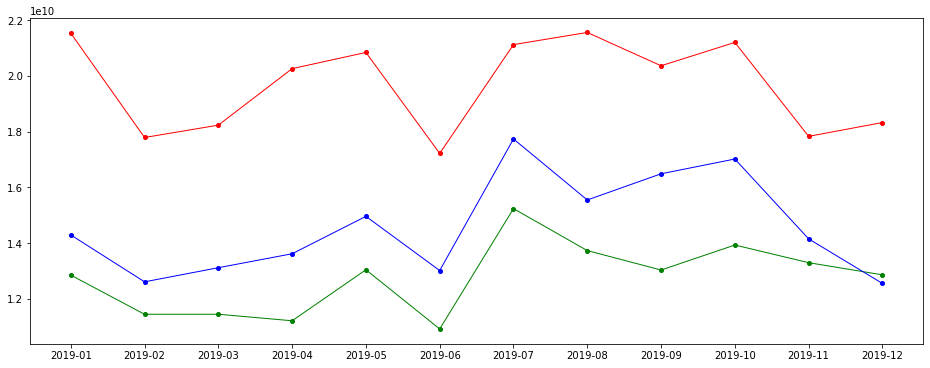

In [111]:
# Plotagem com os totais (quantidade, peso e valor) importados por mês em 2019
fig1, ax1 = plt.subplots(figsize=(16,6))
ax1.plot(g53["ANO-MES"],g53["QT_ESTAT"], color="red", linewidth=1.00,marker='o', markersize=4)
ax1.plot(g53["ANO-MES"],g53["KG_LIQUIDO"], color="green", linewidth=1.00,marker='o', markersize=4)
ax1.plot(g53["ANO-MES"],g53["VL_FOB"], color="blue", linewidth=1.00,marker='o', markersize=4)

A plotagem acima evidencia a clara relação entre quantidade, peso e valor importado mensalmente. Na sequência serão calculadas as correlações dessas três variáveis e checada se existe intereferência do câmbio (mês atual e mês anterior) nas importações.

<AxesSubplot:>

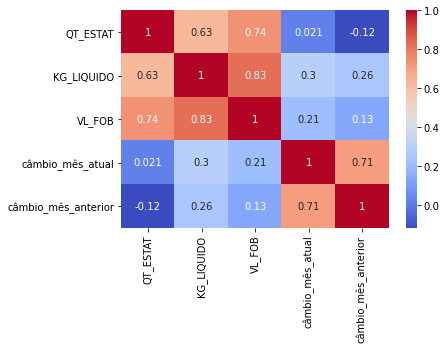

In [113]:
sns.heatmap(g53.corr(),cmap="coolwarm", annot=True)

As correlaçoes identificadas são as já apontadas anteriormente por meio do gráfico plotado (QT_ESTAT, KG_LIQUIDO e VL_FOB). Não foi identificada correlação entre a taxa cambial e as importações. (a única correlação significativa identificada em relação às taxas de câmbio é óbvia - entre câmbio mês anterior e câmbio mês atual).
No próximo Jupyter Notebook a correlação entre as variáveis será trabalhada com maior detalhamento, no intuito de se buscar um modelo de "machine learning" que permita prever o valor FOB (em USD) por unidade de medida estatística da mercadoria importada.